In [12]:
import os
import csv
import re
import pandas as pd

datanames = ['ST260_Day4','ST260_Day3','ST260_Day2','ST260_Day1']
serials = [0,1,2,3,4]
spike_metrics = ['cascade']
filename = '80epochs'

df = pd.DataFrame(columns=['dataname','serial','grouping method','firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std'])

for filename in ['80epochs']:
    for dataname in datanames:
        for serial in serials:
            run_as_a_whole_datapath = os.path.join(filename, dataname+'_'+str(serial))
            max_val_datapath = os.path.join(filename,'whole_'+ dataname+'_cascade_GPFA_'+str(serial))
            random_datapath = os.path.join(filename, 'whole_'+dataname+'_cascade_random_'+str(serial))
            kmeans_datapath = os.path.join(filename, 'whole_'+dataname+'_cascade_GPFA_kmeans_'+str(serial))
            # dbscan_datapath = os.path.join( dataname+'_cascade_GPFA_dbscan_'+str(serial)+'_merged')
            datapaths = [run_as_a_whole_datapath, random_datapath,max_val_datapath,kmeans_datapath]
            grouping_type = ['whole','random','max_val','kmeans']
            for spike_metric in spike_metrics:
                all_stats = {}
                for i in range(len(datapaths)):
                    txt_location = os.path.join( datapaths[i], 'metrics','plots_'+spike_metric,'stats.txt')
                    if os.path.exists(txt_location):
                        with open(txt_location,'r') as f:
                            stats = f.read()
                        firing_rate_KL_mean = re.findall('firing rate KL mean: ([\d\.]+),', stats)[0]
                        firing_rate_KL_std = re.findall('kL std ([\d\.]+)', stats)[0]
                        corr_coef_KL_mean = re.findall('correlation coefficient KL mean: ([\d\.]+),', stats)[0]
                        corr_coef_KL_std = re.findall('kl std ([\d\.]+)', stats)[0]
                        van_rossum_KL_mean = re.findall('van rossum KL mean: ([\d\.]+),', stats)[0]
                        van_rossum_KL_std = re.findall('kl std ([\d\.]+)', stats)[1]
                        all_stats[grouping_type[i]] = [firing_rate_KL_mean,corr_coef_KL_mean,van_rossum_KL_mean,
                        firing_rate_KL_std,corr_coef_KL_std,van_rossum_KL_std]
                        if spike_metric == 'cascade':
                            df.loc[len(df)] = [dataname,serial,grouping_type[i],float(firing_rate_KL_mean),float(corr_coef_KL_mean),float(van_rossum_KL_mean),float(firing_rate_KL_std),float(corr_coef_KL_std),float(van_rossum_KL_std)]

                all_stats_df = pd.DataFrame.from_dict(all_stats)
                if len(all_stats.keys()) >0:
                    metric_index = pd.Series(list(range(len(all_stats_df))))
                    metric_str_index = pd.Series(['firing_rate_kl_mean','corr_coef_kl_mean','van_rossum_kl_mean',
                                                    'firing_rate_kl_std','corr_coef_kl_std','van_rossum_kl_std'])
                    all_stats_df = all_stats_df.set_index([metric_index,metric_str_index])
                print(dataname,spike_metric,'experiment '+str(serial))
                print(all_stats_df)

ST260_Day4 cascade experiment 0
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.986973  1.043292  0.962546  0.980416
1 corr_coef_kl_mean    0.081500  0.088202  0.105183  0.068626
2 van_rossum_kl_mean   0.124069  0.140685  0.148124  0.177562
3 firing_rate_kl_std   1.549785  1.383142  1.552134  1.366913
4 corr_coef_kl_std     0.042769  0.046338  0.055294  0.040533
5 van_rossum_kl_std    0.061109  0.074857  0.086485  0.109708
ST260_Day4 cascade experiment 1
                          whole    random   max_val    kmeans
0 firing_rate_kl_mean  0.923214  1.386368  1.054355  0.983453
1 corr_coef_kl_mean    0.062414  0.111736  0.080075  0.083805
2 van_rossum_kl_mean   0.131346  0.189507  0.152555  0.148910
3 firing_rate_kl_std   1.186032  1.811234  1.630565  1.413880
4 corr_coef_kl_std     0.035675  0.068050  0.052624  0.041302
5 van_rossum_kl_std    0.065229  0.107903  0.088501  0.092250
ST260_Day4 cascade experiment 2
                          whole   ma

In [13]:
grouping_methods_makes_the_data_valid = ['whole','random','max_val','kmeans']
dataname_filter = df.groupby('dataname').filter(lambda x: set(grouping_methods_makes_the_data_valid).issubset(set(x['grouping method'])))
df_filtered = df.loc[df['dataname'].isin(dataname_filter['dataname'])]
df_filtered

,dataname,serial,grouping method,firing_r_KL_mean,corr_c_KL_mean,van_r_KL_mean,firing_r_KL_std,corr_c_KL_std,van_r_KL_std
0,ST260_Day4,0,whole,0.986973,0.081500,0.124069,1.549785,0.042769,0.061109
1,ST260_Day4,0,random,1.043292,0.088202,0.140685,1.383142,0.046338,0.074857
2,ST260_Day4,0,max_val,0.962546,0.105183,0.148124,1.552134,0.055294,0.086485
3,ST260_Day4,0,kmeans,0.980416,0.068626,0.177562,1.366913,0.040533,0.109708
4,ST260_Day4,1,whole,0.923214,0.062414,0.131346,1.186032,0.035675,0.065229
5,ST260_Day4,1,random,1.386368,0.111736,0.189507,1.811234,0.068050,0.107903
6,ST260_Day4,1,max_val,1.054355,0.080075,0.152555,1.630565,0.052624,0.088501
7,ST260_Day4,1,kmeans,0.983453,0.083805,0.148910,1.413880,0.041302,0.092250
8,ST260_Day4,2,whole,0.851991,0.080947,0.150002,1.147363,0.049018,0.088176
9,ST260_Day4,2,max_val,1.201859,0.141723,0.130061,1.921558,0.049280,0.077670


In [21]:

whole = df_filtered.loc[(df['grouping method'] == 'whole') ,['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
random = df_filtered.loc[(df['grouping method'] == 'random'),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
max_val = df_filtered.loc[(df['grouping method'] == 'max_val'),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)
kmeans = df_filtered.loc[(df['grouping method'] == 'kmeans'),['firing_r_KL_mean', 'corr_c_KL_mean', 'van_r_KL_mean','firing_r_KL_std','corr_c_KL_std','van_r_KL_std']].mean(numeric_only=True)

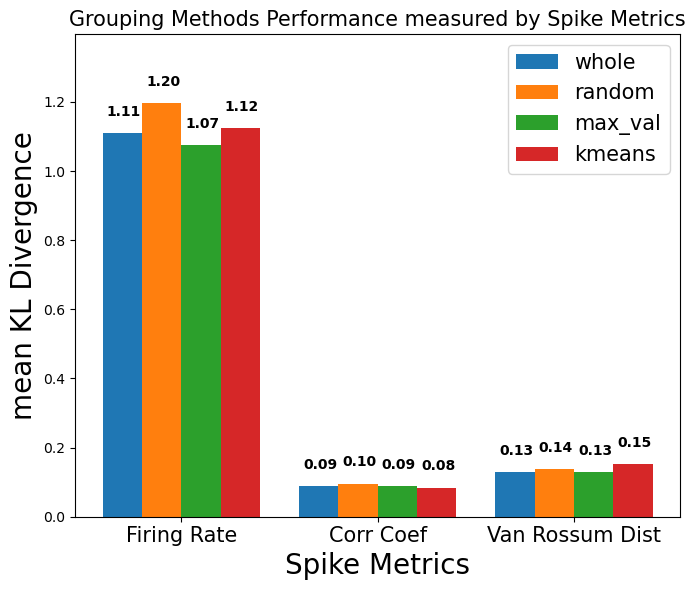

In [23]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Firing Rate', 'Corr Coef', 'Van Rossum Dist']
bar_width = 0.2
r1 = np.arange(3)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
fig = plt.figure(figsize=(7, 6))
plt.bar(r1, list(whole)[0:3], color='tab:blue', width=bar_width, label='whole')
plt.bar(r2, list(random)[0:3], color='tab:orange', width=bar_width, label='random')
plt.bar(r3,  list(max_val)[0:3], color='tab:green', width=bar_width, label='max_val')
plt.bar(r4,  list(kmeans)[0:3], color='tab:red', width=bar_width, label='kmeans')

txt_x_offset = -0.08
txt_y_offset = 0.05
max_y = 0
for i in range(3):
    plt.text(x=r1[i]+txt_x_offset, y=whole[i]+txt_y_offset, s=f'{whole[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r2[i]+txt_x_offset, y=random[i]+txt_y_offset, s=f'{random[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r3[i]+txt_x_offset, y=max_val[i]+txt_y_offset, s=f'{max_val[i]:.2f}', color='black', fontweight='bold')
    plt.text(x=r4[i]+txt_x_offset, y=kmeans[i]+txt_y_offset, s=f'{kmeans[i]:.2f}', color='black', fontweight='bold')
    max_y = max(max_y, whole[i], random[i], max_val[i], kmeans[i])
    
plt.xticks([r + bar_width*1.5 for r in range(3)], labels,fontsize=15)
plt.legend(fontsize=15)
plt.ylim(0, max_y + txt_y_offset*4)
plt.xlabel('Spike Metrics',fontsize=20)
plt.ylabel('mean KL Divergence',fontsize=20)
plt.title('Grouping Methods Performance measured by Spike Metrics',fontsize=15)
plt.tight_layout()
if not os.path.exists('../figs/'):
    os.makedirs('../figs/')
plt.savefig('../figs/whole_mean_kl.pdf',format = 'pdf')

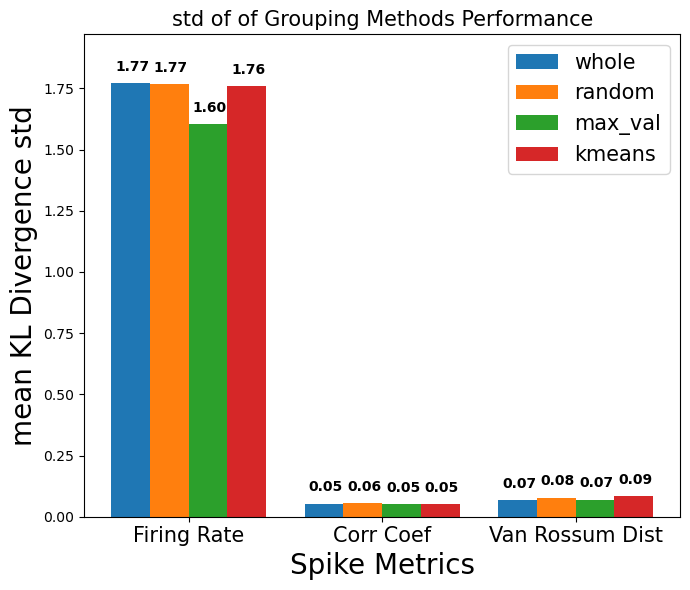

In [24]:
fig = plt.figure(figsize=(7, 6))
plt.bar(r1, list(whole)[3:6], color='tab:blue', width=bar_width, label='whole')
plt.bar(r2, list(random)[3:6], color='tab:orange', width=bar_width, label='random')
plt.bar(r3,  list(max_val)[3:6], color='tab:green', width=bar_width, label='max_val')
plt.bar(r4,  list(kmeans)[3:6], color='tab:red', width=bar_width, label='kmeans')

txt_x_offset = -0.08
txt_y_offset = 0.05
max_y = 0
for i in range(0,3):
    plt.text(x=r1[i]+txt_x_offset, y=whole[i+3]+txt_y_offset, s=f'{whole[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r2[i]+txt_x_offset, y=random[i+3]+txt_y_offset, s=f'{random[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r3[i]+txt_x_offset, y=max_val[i+3]+txt_y_offset, s=f'{max_val[i+3]:.2f}', color='black', fontweight='bold')
    plt.text(x=r4[i]+txt_x_offset, y=kmeans[i+3]+txt_y_offset, s=f'{kmeans[i+3]:.2f}', color='black', fontweight='bold')
    max_y = max(max_y, whole[i+3], random[i+3], max_val[i+3], kmeans[i+3])
    
plt.xticks([r + bar_width*1.5 for r in range(3)], labels,fontsize=15)
plt.legend(fontsize=15)
plt.ylim(0, max_y + txt_y_offset*4)
plt.xlabel('Spike Metrics',fontsize=20)
plt.ylabel('mean KL Divergence std',fontsize=20)
plt.title('std of of Grouping Methods Performance',fontsize=15)
plt.tight_layout()
if not os.path.exists('../figs/'):
    os.makedirs('../figs/')
plt.savefig('../figs/whole_var_kl.pdf',format = 'pdf')

In [25]:
from scipy import stats

# Group the DataFrame by grouping_method
grouped_df = df.groupby(['grouping method'])

# Initialize a dictionary to store the data for each grouping method
data_by_grouping_method = {method: pd.DataFrame() for method in df['grouping method'].unique()}

# Organize the data by grouping method
for grouping_method, group_df in grouped_df:
    data_by_grouping_method[grouping_method] = group_df

# Compare 'whole' grouping method with other methods
whole_group = data_by_grouping_method['whole']
other_methods = ['random', 'max_val', 'kmeans']

for method in other_methods:
    other_group = data_by_grouping_method[method]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(whole_group['firing_r_KL_mean'], other_group['firing_r_KL_mean'],equal_var=False)
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(whole_group['corr_c_KL_mean'], other_group['corr_c_KL_mean'],equal_var=False)
    van_r_t_stat, van_r_p_value = stats.ttest_ind(whole_group['van_r_KL_mean'], other_group['van_r_KL_mean'],equal_var=False)

    print(f"Comparison: whole vs {method}")
    print(f"Firing R KL Mean t-stat: {firing_r_t_stat}, p-value: {firing_r_p_value}")
    print(f"Corr C KL Mean t-stat: {corr_c_t_stat}, p-value: {corr_c_p_value}")
    print(f"Van R KL Mean t-stat: {van_r_t_stat}, p-value: {van_r_p_value}")

Comparison: whole vs random
Firing R KL Mean t-stat: -0.9750862824021759, p-value: 0.3364044945778195
Corr C KL Mean t-stat: -0.8271803424353598, p-value: 0.41663634404224525
Van R KL Mean t-stat: -0.9038601493982404, p-value: 0.37459192188432844
Comparison: whole vs max_val
Firing R KL Mean t-stat: 0.8131220390715175, p-value: 0.42193645543531555
Corr C KL Mean t-stat: -1.0045328319850648, p-value: 0.32222867212281714
Van R KL Mean t-stat: -0.35691474093940206, p-value: 0.7236245479626834
Comparison: whole vs kmeans
Firing R KL Mean t-stat: 0.08594836960574805, p-value: 0.9322847240291344
Corr C KL Mean t-stat: -0.3311731876774146, p-value: 0.7431858531938875
Van R KL Mean t-stat: -1.6752622807156623, p-value: 0.11393019585572303


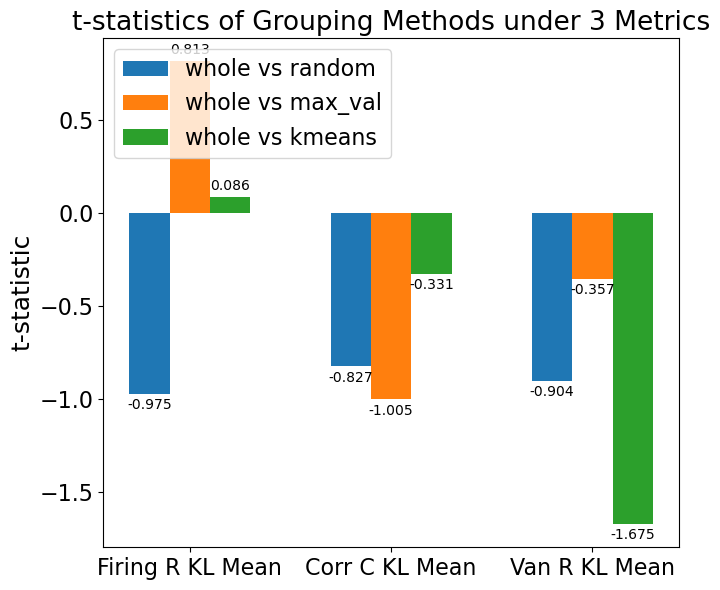

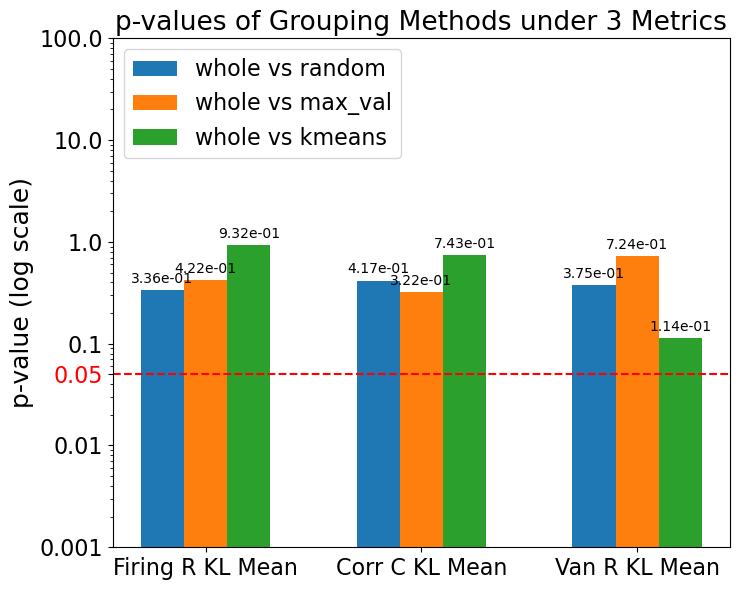

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the t-statistics and p-values for each metric
t_stats = []
p_values = []

# Set up the labels for the comparison groups
comparison_labels = [f"whole vs {method}" for method in other_methods]

# Collect the t-statistics and p-values for each comparison and metric
for method in other_methods:
    other_group = data_by_grouping_method[method]

    firing_r_t_stat, firing_r_p_value = stats.ttest_ind(whole_group['firing_r_KL_mean'], other_group['firing_r_KL_mean'], equal_var=False)
    corr_c_t_stat, corr_c_p_value = stats.ttest_ind(whole_group['corr_c_KL_mean'], other_group['corr_c_KL_mean'], equal_var=False)
    van_r_t_stat, van_r_p_value = stats.ttest_ind(whole_group['van_r_KL_mean'], other_group['van_r_KL_mean'], equal_var=False)

    t_stats.append([firing_r_t_stat, corr_c_t_stat, van_r_t_stat])
    p_values.append([firing_r_p_value, corr_c_p_value, van_r_p_value])

# Convert the lists to NumPy arrays for easy plotting
t_stats = np.array(t_stats)
p_values = np.array(p_values)

# Set up the x-axis labels for the metrics
metrics = ['Firing R KL Mean', 'Corr C KL Mean', 'Van R KL Mean']


def autolabel(rects, ax, is_ttest=False):
    """Attach a text label above or below each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if is_ttest:
            label_format = f'{height:.3f}'
        else:
            label_format = f'{height:.2e}'

        if height >= 0:
            ax.annotate(label_format,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(label_format,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='top')

title_fontsize = 19
ylabel_fontsize = 18
xticklabel_fontsize = 16
yticklabel_fontsize = 16
legend_fontsize = 16

# Create a bar plot for the t-statistics
fig, ax = plt.subplots(figsize=(7, 6))
x = np.arange(len(metrics))
width = 0.2

bar_list_ttest = []
for i, label in enumerate(comparison_labels):
    bars = ax.bar(x + i * width, t_stats[i], width, label=label)
    bar_list_ttest.append(bars)

ax.set_ylabel('t-statistic', fontsize=ylabel_fontsize)
ax.set_title('t-statistics of Grouping Methods under 3 Metrics', fontsize=title_fontsize)
ax.set_xticks(x + width * (len(comparison_labels) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=xticklabel_fontsize)
ax.tick_params(axis='y', labelsize=yticklabel_fontsize)
ax.legend(loc='upper left', fontsize=legend_fontsize)

# Add text labels to the bars
for bars in bar_list_ttest:
    autolabel(bars, ax, is_ttest=True)
plt.tight_layout()
# plt.show()
plt.savefig('../figs/whole_t-stats.pdf',format = 'pdf')

# Create a bar plot for the p-values
fig, ax = plt.subplots(figsize=(7.5, 6))

bar_list = []
for i, label in enumerate(comparison_labels):
    bars = ax.bar(x + i * width, p_values[i], width, label=label)
    bar_list.append(bars)

ax.set_yscale('log')
ax.axhline(0.05, color='red', linestyle='--')
ax.set_ylabel('p-value (log scale)', fontsize=ylabel_fontsize)
ax.set_title('p-values of Grouping Methods under 3 Metrics', fontsize=title_fontsize)
ax.set_xticks(x + width * (len(comparison_labels) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=xticklabel_fontsize)

yticks = list(ax.get_yticks())
yticks.append(0.05)
yticks = sorted(yticks)

yticklabels = [str(tick) if tick != 0.05 else f"{tick:.2f}" for tick in yticks]
# yticklabels[-2] = f"{0.05:.2f}"  # Red color for the 0.05 tick label
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=yticklabel_fontsize)
ax.get_yticklabels()[-5].set_color("red")

ax.legend(loc='upper left', fontsize=legend_fontsize)

# Add text labels to the bars
for bars in bar_list:
    autolabel(bars, ax)
plt.tight_layout()
# plt.show()
plt.savefig('../figs/whole_p-val.pdf',format = 'pdf')